## TASK_B Below Zero - ice cream store 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
region = pd.read_csv('Region.csv')
region.head()

,Store,Region
0,1,A
1,2,A
2,3,A
3,4,A
4,5,A


In [4]:
region.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Region  45 non-null     object
dtypes: int64(1), object(1)
memory usage: 848.0+ bytes


In [5]:
region.isnull().sum()

Store     0
Region    0
dtype: int64

In [6]:
storedetails = pd.read_csv('StoreDetails.csv')
storedetails

,Store,Date,Temperature,Unemployment
0,1,5/02/2010,42.31,8.106
1,1,12/02/2010,38.51,8.106
2,1,19/02/2010,39.93,8.106
3,1,26/02/2010,46.63,8.106
4,1,5/03/2010,46.50,8.106
...,...,...,...,...
8185,45,28/06/2013,76.05,NaN
8186,45,5/07/2013,77.50,NaN
8187,45,12/07/2013,79.37,NaN
8188,45,19/07/2013,82.84,NaN


In [7]:
storedetails.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Unemployment  7605 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 256.1+ KB


In [8]:
storedetails.isnull().sum()

Store             0
Date              0
Temperature       0
Unemployment    585
dtype: int64

In [9]:
storedetails.fillna(storedetails['Unemployment'].mean(),inplace=True)

In [10]:
storedetails.isnull().sum()

Store           0
Date            0
Temperature     0
Unemployment    0
dtype: int64

In [11]:
storedetails.tail(20)

,Store,Date,Temperature,Unemployment
8170,45,15/03/2013,42.81,8.625000
8171,45,22/03/2013,36.55,8.625000
8172,45,29/03/2013,40.68,8.625000
8173,45,5/04/2013,43.94,8.335000
8174,45,12/04/2013,57.39,8.335000
8175,45,19/04/2013,56.27,8.335000
8176,45,26/04/2013,50.64,8.335000
8177,45,3/05/2013,56.07,7.826821
8178,45,10/05/2013,58.86,7.826821
8179,45,17/05/2013,60.59,7.826821


In [12]:
weeklysales = pd.read_csv('Weekly-Sales.csv')
weeklysales

,Store,Date,Weekly_Sales
0,1,5/02/2010,24924.50
1,1,12/02/2010,46039.49
2,1,19/02/2010,41595.55
3,1,26/02/2010,19403.54
4,1,5/03/2010,21827.90
...,...,...,...
6430,45,28/09/2012,13153.22
6431,45,5/10/2012,15309.43
6432,45,12/10/2012,16109.15
6433,45,19/10/2012,19128.81


In [13]:
weeklysales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 150.9+ KB


In [14]:
weeklysales.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
dtype: int64

### Merging data Files

In [15]:
store_data=pd.merge(storedetails,weeklysales,on=['Store','Date'])
store_data

,Store,Date,Temperature,Unemployment,Weekly_Sales
0,1,5/02/2010,42.31,8.106,24924.50
1,1,12/02/2010,38.51,8.106,46039.49
2,1,19/02/2010,39.93,8.106,41595.55
3,1,26/02/2010,46.63,8.106,19403.54
4,1,5/03/2010,46.50,8.106,21827.90
...,...,...,...,...,...
6430,45,28/09/2012,64.88,8.684,13153.22
6431,45,5/10/2012,64.89,8.667,15309.43
6432,45,12/10/2012,54.47,8.667,16109.15
6433,45,19/10/2012,56.47,8.667,19128.81


In [16]:
store_data=pd.merge(store_data,region,on=['Store'])
store_data

,Store,Date,Temperature,Unemployment,Weekly_Sales,Region
0,1,5/02/2010,42.31,8.106,24924.50,A
1,1,12/02/2010,38.51,8.106,46039.49,A
2,1,19/02/2010,39.93,8.106,41595.55,A
3,1,26/02/2010,46.63,8.106,19403.54,A
4,1,5/03/2010,46.50,8.106,21827.90,A
...,...,...,...,...,...,...
6430,45,28/09/2012,64.88,8.684,13153.22,E
6431,45,5/10/2012,64.89,8.667,15309.43,E
6432,45,12/10/2012,54.47,8.667,16109.15,E
6433,45,19/10/2012,56.47,8.667,19128.81,E


In [17]:
region.groupby(['Region'])['Store'].count()   #stores in each region

Region
A    9
B    9
C    9
D    9
E    9
Name: Store, dtype: int64

### Comparing the trends of all stores in a given year.

In [20]:
region_profit=store_data.groupby(['Region'])['Weekly_Sales'].sum()  # Totalsale of each region from 2010-2012
region_profit

Region
A    23941225.67
B    31994329.50
C    31535066.89
D    18208384.07
E    17959770.41
Name: Weekly_Sales, dtype: float64

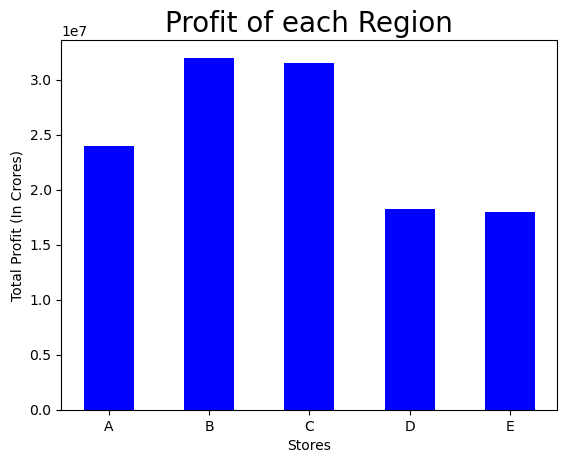

In [57]:
d=['A','B','C','D','E']
plt.subplots()
plt.bar(d,region_profit,color ='b',width=0.50)

plt.xlabel('Stores',fontsize='10')
plt.ylabel('Total Profit (In Crores)',fontsize='10')

plt.title('Profit of each Region',fontsize='20')
plt.savefig('Regionprofit.png')
plt.show()


In [18]:
store_profit=store_data.groupby(['Store'])['Weekly_Sales'].sum()    # Totalsale of each store from 2010-2012
store_profit

Store
1     3219405.18
2     4401251.25
3     1047992.81
4     5288131.43
5     1397761.09
6     3413060.19
7     1364620.58
8     2114945.31
9     1694057.83
10    5709294.87
11    2697110.41
12    2478202.53
13    6723925.13
14    4377485.02
15    1979941.94
16    1623404.55
17    3260630.11
18    3144334.94
19    3075076.17
20    5798002.67
21    2137857.04
22    3073537.77
23    4745663.86
24    2696840.34
25    2880863.34
26    2774595.10
27    4352630.60
28    2885804.92
29    2217172.04
30    1399737.86
31    2482001.30
32    3267927.45
33     340209.38
34    2852502.95
35    2442818.65
36     320209.52
37    1576465.73
38     990066.01
39    3135278.03
40    2687624.77
41    3318352.17
42    1483646.22
43    1079522.59
44    1151148.90
45    2537665.99
Name: Weekly_Sales, dtype: float64

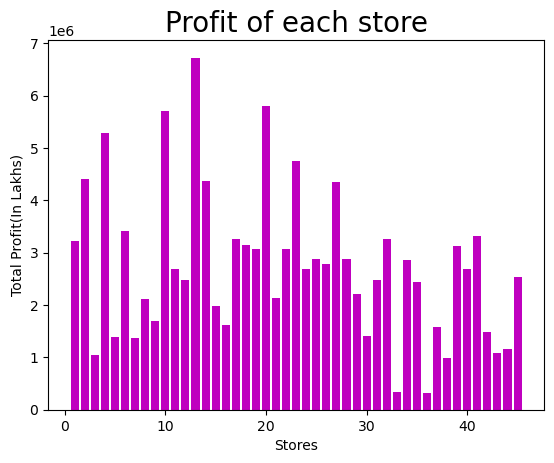

In [58]:
d=[x for x in range(46)if x>0]
plt.subplots()
plt.bar(d,store_profit,color ='m')

plt.xlabel('Stores',fontsize='10')
plt.ylabel('Total Profit(In Lakhs)',fontsize='10')

plt.title('Profit of each store',fontsize='20')
plt.savefig('storeprofit.png')
plt.show()
# plt.show()

In [22]:
store_profit.sort_values(ascending=False).head(10) #top 10 stores with maximum profit


Store
13    6723925.13
20    5798002.67
10    5709294.87
4     5288131.43
23    4745663.86
2     4401251.25
14    4377485.02
27    4352630.60
6     3413060.19
41    3318352.17
Name: Weekly_Sales, dtype: float64

### Show the change in ice cream sales over the period 2010 to 2012

In [45]:
df_1=store_data[store_data['Date'].str.contains("/2010")]     

In [24]:
df1=df_1.groupby(['Region'])['Weekly_Sales'].sum().sort_values(ascending=False)
df1

Region
C    11255439.84
B    11138795.06
A     8202911.50
D     6274930.62
E     5971457.36
Name: Weekly_Sales, dtype: float64

In [25]:
df_2=store_data[store_data['Date'].str.contains("/2011")]

In [26]:
df2=df_2.groupby(['Region'])['Weekly_Sales'].sum().sort_values(ascending=False)
df2

Region
B    11885412.92
C    11512218.97
A     8705549.43
D     6671399.21
E     6574733.87
Name: Weekly_Sales, dtype: float64

In [27]:
df_3=store_data[store_data['Date'].str.contains("/2012")]

In [28]:
df3=df_3.groupby(['Region'])['Weekly_Sales'].sum().sort_values(ascending=False)
df3

Region
B    8970121.52
C    8767408.08
A    7032764.74
E    5413579.18
D    5262054.24
Name: Weekly_Sales, dtype: float64

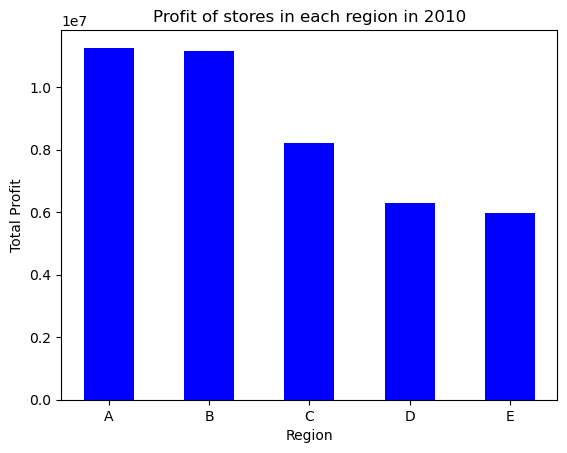

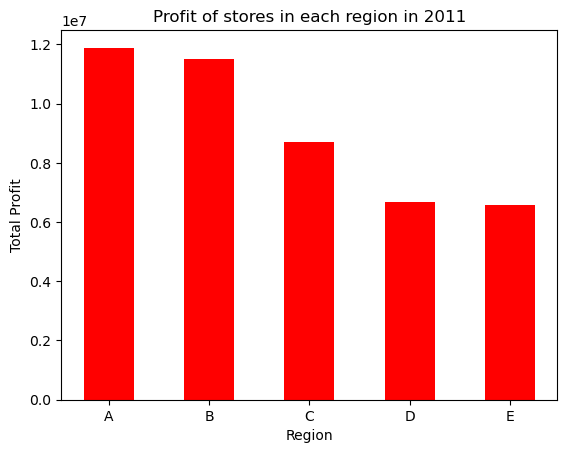

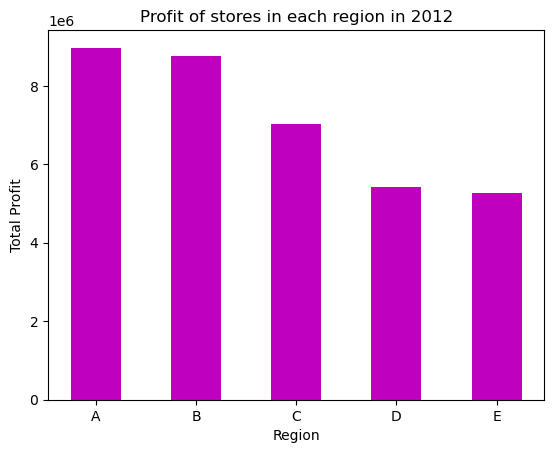

In [29]:
d=['A','B','C','D','E']                             #Bar plot for each Region
plt.bar(d,df1,color ='b',width=0.50)

plt.xlabel('Region')
plt.ylabel('Total Profit')

plt.title('Profit of stores in each region in 2010')
plt.show()

plt.bar(d,df2,color ='r',width=0.50)

plt.xlabel('Region')
plt.ylabel('Total Profit')

plt.title('Profit of stores in each region in 2011')
plt.show()

plt.bar(d,df3,color ='m',width=0.50)

plt.xlabel('Region')
plt.ylabel('Total Profit')

plt.title('Profit of stores in each region in 2012')
plt.show()

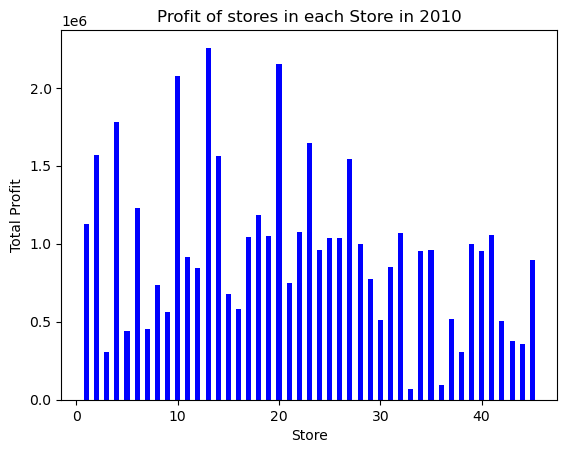

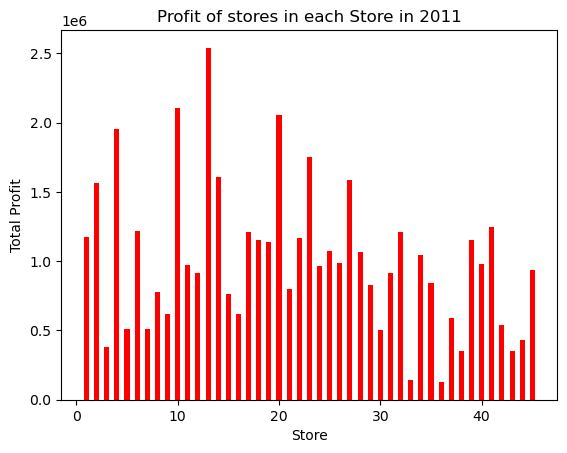

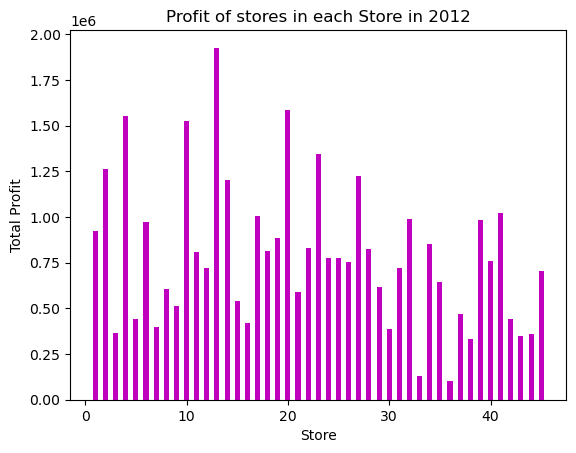

In [30]:
d=[x for x in range(46)if x>0]                            #Bar chart for each Store
store1= df_1.groupby(['Store'])['Weekly_Sales'].sum()
plt.bar(d,store1,color ='b',width=0.50)

plt.xlabel('Store')
plt.ylabel('Total Profit')

plt.title('Profit of stores in each Store in 2010')
plt.show()

store2= df_2.groupby(['Store'])['Weekly_Sales'].sum()
plt.bar(d,store2,color ='r',width=0.50)

plt.xlabel('Store')
plt.ylabel('Total Profit')

plt.title('Profit of stores in each Store in 2011')
plt.show()

store3= df_3.groupby(['Store'])['Weekly_Sales'].sum()
plt.bar(d,store3,color ='m',width=0.50)

plt.xlabel('Store')
plt.ylabel('Total Profit')

plt.title('Profit of stores in each Store in 2012')
plt.show()

### Top 10 performing stores each year

In [31]:
df_1.groupby(['Store'])['Weekly_Sales'].sum().sort_values(ascending=False).head(10)

Store
13    2257010.66
20    2155536.75
10    2073394.31
4     1779957.23
23    1648923.44
2     1571898.18
14    1565400.69
27    1544366.01
6     1227756.19
18    1182928.09
Name: Weekly_Sales, dtype: float64

In [32]:
df_2.groupby(['Store'])['Weekly_Sales'].sum().sort_values(ascending=False).head(10)

Store
13    2540585.58
10    2108481.44
20    2056700.30
4     1954980.78
23    1750173.16
14    1610669.10
27    1583136.21
2     1566742.87
41    1244173.41
6     1215094.97
Name: Weekly_Sales, dtype: float64

In [33]:
df_3.groupby(['Store'])['Weekly_Sales'].sum().sort_values(ascending=False).head(10)

Store
13    1926328.89
20    1585765.62
4     1553193.42
10    1527419.12
23    1346567.26
2     1262610.20
27    1225128.38
14    1201415.23
41    1020020.00
17    1007126.78
Name: Weekly_Sales, dtype: float64

## Temperature

In [34]:
#by region
store_data.groupby(['Region'])['Temperature'].mean()

Region
A    64.370031
B    58.121694
C    54.159340
D    64.366472
E    62.301375
Name: Temperature, dtype: float64

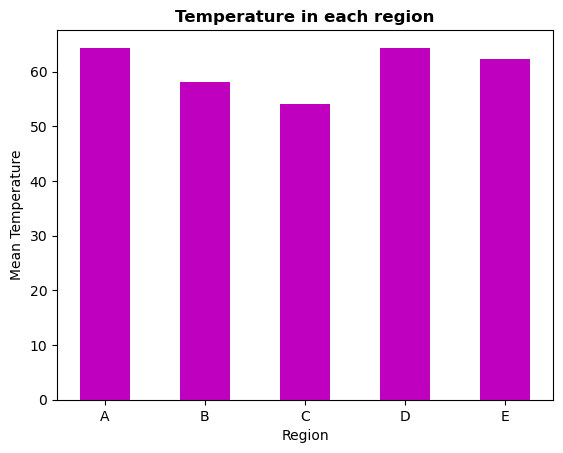

In [35]:
d=['A','B','C','D','E']

plt.bar(d,store_data.groupby(['Region'])['Temperature'].mean(),color ='m',width=0.50)
plt.xlabel('Region')
plt.ylabel('Mean Temperature')
plt.title('Temperature in each region',fontweight='bold')
plt.show()

In [36]:
# By Store details

In [37]:
store_data.groupby(['Store'])['Temperature'].mean().head(5)

Store
1    68.306783
2    68.216364
3    71.434196
4    62.253357
5    69.410140
Name: Temperature, dtype: float64

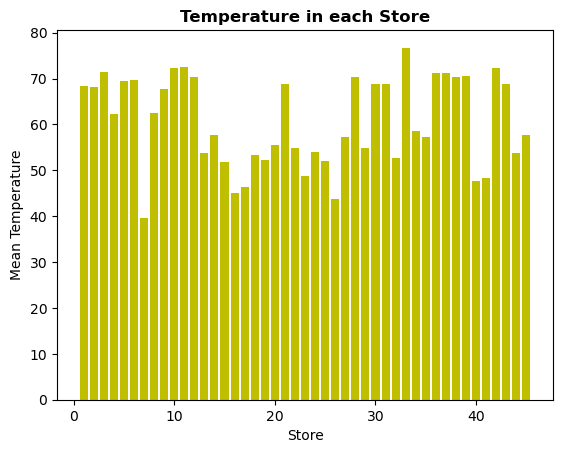

In [61]:
## Barplot for Temperature in each Store
d=[x for x in range(46)if x>0]   

plt.bar(d,store_data.groupby(['Store'])['Temperature'].mean(),color ='y')
plt.xlabel('Store')
plt.ylabel('Mean Temperature')
plt.title('Temperature in each Store',fontweight='bold')
plt.show()

## Unemployment

In [39]:
#by each region
store_data.groupby(['Region'])['Unemployment'].mean()

Region
A    6.895079
B    8.240995
C    7.505460
D    9.097986
E    8.256235
Name: Unemployment, dtype: float64

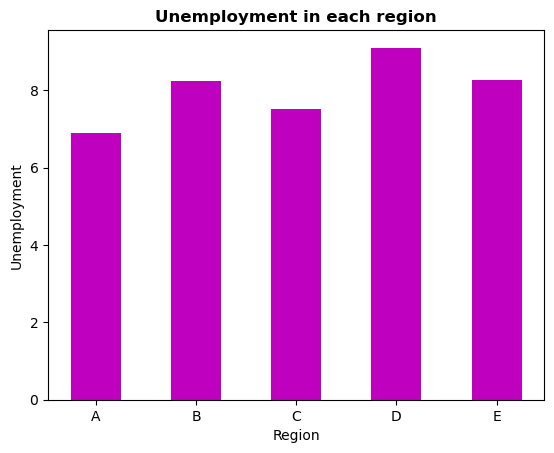

In [40]:
d=['A','B','C','D','E']

plt.bar(d,store_data.groupby(['Region'])['Unemployment'].mean(),color ='m',width=0.50)
plt.xlabel('Region')
plt.ylabel('Unemployment')
plt.title('Unemployment in each region',fontweight='bold')
plt.show()

In [41]:

store_data.groupby(['Store'])['Unemployment'].mean().head()

Store
1    7.610420
2    7.623846
3    7.176986
4    5.964692
5    6.295406
Name: Unemployment, dtype: float64

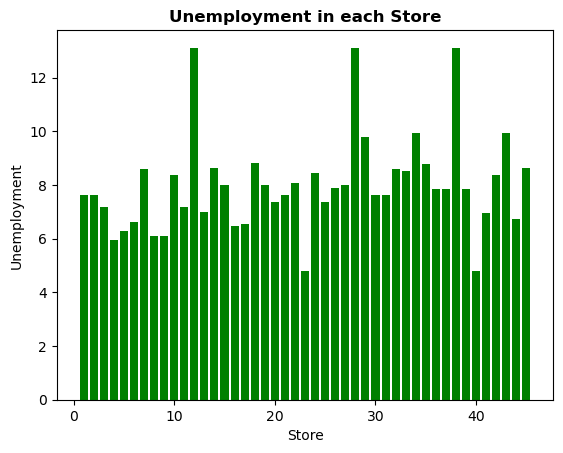

In [42]:
d=[x for x in range(46)if x>0]   

plt.bar(d,store_data.groupby(['Store'])['Unemployment'].mean(),color ='g')
plt.xlabel('Store')
plt.ylabel('Unemployment')
plt.title('Unemployment in each Store',fontweight='bold')
plt.show()

## Comparing sales against the different store details (i.e. temperature and unemployment) to see what the relationship between them is 

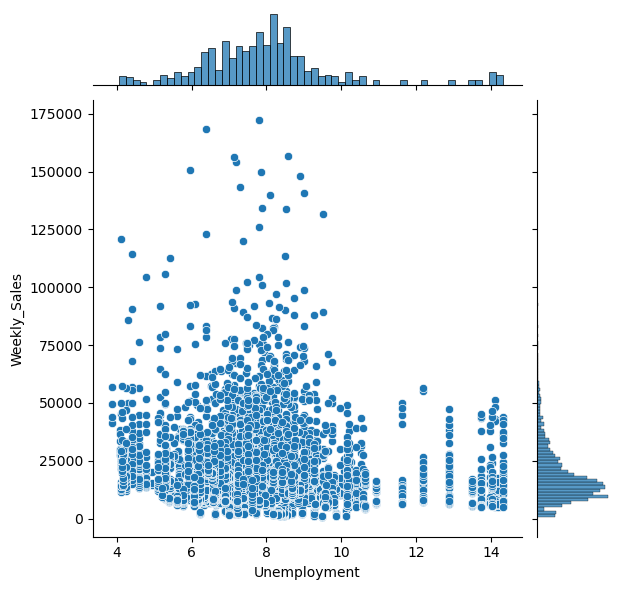

In [54]:
sns.jointplot(x='Unemployment',y='Weekly_Sales',data=store_data)
plt.savefig('Relationship.png')